In [1]:
%matplotlib inline

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from scipy.stats import pearsonr

from loren_frank_data_processing import (make_epochs_dataframe,make_neuron_dataframe)
from src.parameters import (ANIMALS, MIN_N_NEURONS, _BRAIN_AREAS)
from src.load_data import get_sleep_and_prev_run_epochs
from ZilongCode.utils import get_sweep_and_sleep_replay_results

In [3]:
epoch_info = make_epochs_dataframe(ANIMALS)
neuron_info = make_neuron_dataframe(ANIMALS)

neuron_info = neuron_info.loc[
(neuron_info.type == 'principal') &
(neuron_info.numspikes > 100) &
neuron_info.area.isin(_BRAIN_AREAS)]

n_neurons = (neuron_info
                .groupby(['animal', 'day', 'epoch'])
                .neuron_id
                .agg(len)
                .rename('n_neurons')
                .to_frame())

epoch_info = epoch_info.join(n_neurons)

# select only sleep epochs
is_sleep = (epoch_info.type.isin(['sleep']))

is_animal = epoch_info.index.isin(['bon', 'fra', 'gov', 'dud', 'con', 'dav', 'Cor', 'egy', 'cha'], level='animal')

#get valid epochs with is_sleep and is_animal and n_neurons > MIN_N_NEURONS
valid_epochs =  epoch_info.loc[is_sleep & 
                                is_animal & 
                                (epoch_info.n_neurons > MIN_N_NEURONS)]

sleep_epoch_keys, prev_run_epoch_keys = get_sleep_and_prev_run_epochs()

# get valid sleep epochs with keys only in sleep_epoch_keys
valid_sleep_epochs = valid_epochs.loc[valid_epochs.index.isin(sleep_epoch_keys)]

DATA_DIR = '/home/zilong/Desktop/replay_trajectory_paper/Processed-Data'

animal_names = ['bon', 'fra', 'gov', 'dud', 'con', 'dav', 'Cor', 'egy', 'cha']


In [4]:

all_sweep_len_peranimal = {}; all_sweep_len_perday = {}
all_exponent_peranimal = {}; all_exponent_perday = {}
all_intercept_peranimal = {}; all_intercept_perday = {}
all_ave_speed_peranimal = {}; all_ave_speed_perday = {}

for name in animal_names:
    
    is_animal = epoch_info.index.isin([name], level='animal')

    valid_epochs =  epoch_info.loc[is_sleep & 
                                   is_animal & 
                                   (epoch_info.n_neurons > MIN_N_NEURONS)]

    valid_sleep_epochs = valid_epochs.loc[valid_epochs.index.isin(sleep_epoch_keys)]
    
    sweep_len = []
    exponent = []
    intercept = []
    ave_speed = []
    for sleep_epoch_key in tqdm(valid_sleep_epochs.index, desc='epochs'):
        
        #get previous run epoch key
        prev_run_epoch_key = prev_run_epoch_keys[sleep_epoch_keys.index(sleep_epoch_key)]
        animal_run, day_run, epoch_run = prev_run_epoch_key
        animal_sleep, day_sleep, epoch_sleep = sleep_epoch_key
        
        #skip 'egy', 10, 2 since no mental_distance_from_actual_position is saved (double check later)
        if (animal_run, day_run, epoch_run ) == ('egy', 10, 2):
            continue
        
        sleep_result = os.path.join(
            DATA_DIR,
            "TrueSleepReplayTrajectories",
            (f"{animal_sleep}_{day_sleep:02d}_{epoch_sleep:02d}_traj.pkl"),
            )  
        #if sleep_result does not exist, skip
        if not os.path.exists(sleep_result):
            continue

        print(f'Animal: {animal_run}, Day: {day_run}, Epoch: {epoch_run}')
        
        #get the average sweep length and replay exponent
        mean_immobile_speed, mean_sweep_dist, replay_exponent, replay_intercept = get_sweep_and_sleep_replay_results(prev_run_epoch_key, sleep_epoch_key, DATA_DIR, sweep_speed_threshold=4)
        
        #print the average sweep length and replay exponent in one line, keep three decimal places
        print(f'Average sweep length: {mean_sweep_dist:.3f}, Diffusion exponent: {replay_exponent:.3f}')
        
        #attach (without overwriting) mean_immobile_speed, mean_sweep_dist, replay_exponent to 
        #all_sweep_len_perday, all_exponent_perday, all_ave_speed_perday with the key of (animal, day)
        all_sweep_len_perday.setdefault((animal_run, day_run), []).append(mean_sweep_dist)
        all_exponent_perday.setdefault((animal_run, day_run), []).append(replay_exponent)
        all_intercept_perday.setdefault((animal_run, day_run), []).append(replay_intercept)
        all_ave_speed_perday.setdefault((animal_run, day_run), []).append(mean_immobile_speed)
        
        ave_speed.append(mean_immobile_speed)
        sweep_len.append(mean_sweep_dist)
        exponent.append(replay_exponent)
        intercept.append(replay_intercept)
    
    all_ave_speed_peranimal[name] = ave_speed  
    all_sweep_len_peranimal[name] = sweep_len
    all_exponent_peranimal[name] = exponent
    all_intercept_peranimal[name] = intercept

epochs:   0%|          | 0/23 [00:00<?, ?it/s]

Animal: bon, Day: 3, Epoch: 2


Average sweep length: 28.694, Diffusion exponent: 0.651
Animal: bon, Day: 3, Epoch: 4
Average sweep length: 15.452, Diffusion exponent: 0.517
Animal: bon, Day: 3, Epoch: 6
Average sweep length: 22.764, Diffusion exponent: 0.525
Animal: bon, Day: 4, Epoch: 4
Average sweep length: 17.515, Diffusion exponent: 0.955
Animal: bon, Day: 4, Epoch: 6
Average sweep length: 26.638, Diffusion exponent: 0.690
Animal: bon, Day: 5, Epoch: 2
Average sweep length: 15.255, Diffusion exponent: 0.572
Animal: bon, Day: 5, Epoch: 4
Average sweep length: 14.941, Diffusion exponent: 0.556
Animal: bon, Day: 6, Epoch: 2
Average sweep length: 18.539, Diffusion exponent: 0.542
Animal: bon, Day: 6, Epoch: 4
Average sweep length: 15.474, Diffusion exponent: 0.548
Animal: bon, Day: 6, Epoch: 6
Average sweep length: 23.922, Diffusion exponent: 0.584
Animal: bon, Day: 7, Epoch: 2
Average sweep length: 16.487, Diffusion exponent: 0.530
Animal: bon, Day: 7, Epoch: 4
Average sweep length: 13.139, Diffusion exponent: 0.53

epochs:   0%|          | 0/27 [00:00<?, ?it/s]

Animal: fra, Day: 6, Epoch: 6
Average sweep length: 15.996, Diffusion exponent: 0.629


epochs:   0%|          | 0/17 [00:00<?, ?it/s]

Animal: gov, Day: 7, Epoch: 4
Average sweep length: 23.374, Diffusion exponent: 0.855
Animal: gov, Day: 8, Epoch: 4
Average sweep length: 24.466, Diffusion exponent: 0.771
Animal: gov, Day: 8, Epoch: 6
Average sweep length: 31.787, Diffusion exponent: 0.703
Animal: gov, Day: 9, Epoch: 5
Average sweep length: 34.040, Diffusion exponent: 0.683
Animal: gov, Day: 11, Epoch: 4
Average sweep length: 47.112, Diffusion exponent: 0.852
Animal: gov, Day: 12, Epoch: 6
Average sweep length: 35.173, Diffusion exponent: 0.792
Animal: gov, Day: 13, Epoch: 6
Average sweep length: 35.406, Diffusion exponent: 0.817


epochs:   0%|          | 0/4 [00:00<?, ?it/s]

Animal: dud, Day: 2, Epoch: 2
Average sweep length: 51.268, Diffusion exponent: 0.718
Animal: dud, Day: 6, Epoch: 4
Average sweep length: 30.150, Diffusion exponent: 0.560


epochs:   0%|          | 0/15 [00:00<?, ?it/s]

Animal: con, Day: 1, Epoch: 4
Average sweep length: 21.269, Diffusion exponent: 0.804
Animal: con, Day: 2, Epoch: 2
Average sweep length: 25.001, Diffusion exponent: 0.618
Animal: con, Day: 2, Epoch: 4
Average sweep length: 22.739, Diffusion exponent: 0.627
Animal: con, Day: 3, Epoch: 2
Average sweep length: 26.488, Diffusion exponent: 0.929
Animal: con, Day: 3, Epoch: 4
Average sweep length: 20.019, Diffusion exponent: 0.754
Animal: con, Day: 4, Epoch: 6
Average sweep length: 19.763, Diffusion exponent: 0.761
Animal: con, Day: 5, Epoch: 2
Average sweep length: 21.089, Diffusion exponent: 0.612
Animal: con, Day: 6, Epoch: 2
Average sweep length: 26.482, Diffusion exponent: 0.621
Animal: con, Day: 6, Epoch: 6
Average sweep length: 25.380, Diffusion exponent: 0.748


epochs:   0%|          | 0/7 [00:00<?, ?it/s]

Animal: dav, Day: 3, Epoch: 6
Average sweep length: 33.076, Diffusion exponent: 0.854
Animal: dav, Day: 4, Epoch: 2
Average sweep length: 45.286, Diffusion exponent: 0.875
Animal: dav, Day: 4, Epoch: 4
Average sweep length: 28.193, Diffusion exponent: 0.809
Animal: dav, Day: 6, Epoch: 2
Average sweep length: 32.341, Diffusion exponent: 0.866
Animal: dav, Day: 6, Epoch: 4
Average sweep length: 22.005, Diffusion exponent: 0.837
Animal: dav, Day: 6, Epoch: 6
Average sweep length: 27.046, Diffusion exponent: 0.812


epochs:   0%|          | 0/12 [00:00<?, ?it/s]

Animal: Cor, Day: 1, Epoch: 4
Average sweep length: 26.151, Diffusion exponent: 0.615
Animal: Cor, Day: 2, Epoch: 2
Average sweep length: 27.537, Diffusion exponent: 0.583
Animal: Cor, Day: 2, Epoch: 4
Average sweep length: 25.822, Diffusion exponent: 0.567
Animal: Cor, Day: 3, Epoch: 4
Average sweep length: 23.716, Diffusion exponent: 0.612
Animal: Cor, Day: 4, Epoch: 4
Average sweep length: 70.488, Diffusion exponent: 0.793
Animal: Cor, Day: 7, Epoch: 2
Average sweep length: 24.679, Diffusion exponent: 0.614


epochs:   0%|          | 0/8 [00:00<?, ?it/s]

Animal: egy, Day: 5, Epoch: 2
Average sweep length: 30.278, Diffusion exponent: 0.776
Animal: egy, Day: 5, Epoch: 4
Average sweep length: 26.949, Diffusion exponent: 0.701
Animal: egy, Day: 5, Epoch: 6
Average sweep length: 29.352, Diffusion exponent: 0.686
Animal: egy, Day: 8, Epoch: 4
Average sweep length: 48.738, Diffusion exponent: 0.739


epochs:   0%|          | 0/3 [00:00<?, ?it/s]

Animal: cha, Day: 4, Epoch: 2
Average sweep length: 50.093, Diffusion exponent: 0.856


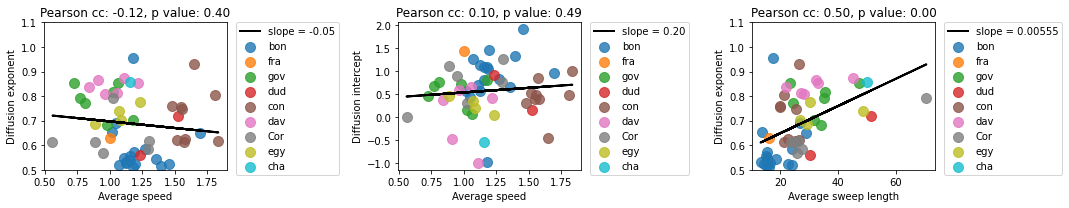

In [7]:
#plot ave_speed against replay_exponent for each animal, each with different color in subplot 1
#plot sweep_len against replay_exponent for each animal, each with different color in subplot 2
#using all_ave_speed_peranimal, all_sweep_len_peranimal, all_exponent_peranimal here

#select colors equals to number of animals from a colormap
#put them in a dictionary with animal names as keys
colors = plt.cm.get_cmap('tab10', len(animal_names))
color_dict = {}
for i, name in enumerate(animal_names):
    color_dict[name] = colors(i)

plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
for name in animal_names:
    plt.scatter(np.array(all_ave_speed_peranimal[name]), np.array(all_exponent_peranimal[name]), 
                label=name, s=100, alpha=0.8, color=color_dict[name])
all_exp_np = np.concatenate(list(all_exponent_peranimal.values()))
all_speed_np = np.concatenate(list(all_ave_speed_peranimal.values()))
#add linear fit line to all_exp_np vs all_speed_np
slope, intercept = np.polyfit(all_speed_np, all_exp_np, 1)
plt.plot(all_speed_np, all_speed_np*slope+intercept, 'k-', label='slope = %.2f'%slope, linewidth=2)
#pearson test
corr, p = pearsonr(all_speed_np, all_exp_np)
plt.title('Pearson cc: %.2f, p value: %.2f'%(corr, p))
plt.xlabel('Average speed')
plt.ylabel('Diffusion exponent')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.ylim([0.5, 1.1])

#intercept
plt.subplot(1,3,2)
for name in animal_names:
    plt.scatter(np.array(all_ave_speed_peranimal[name]), np.array(all_intercept_peranimal[name]), 
                label=name, s=100, alpha=0.8, color=color_dict[name])
    
all_intercept_np = np.concatenate(list(all_intercept_peranimal.values()))
all_speed_np = np.concatenate(list(all_ave_speed_peranimal.values()))
#add linear fit line to all_exp_np vs all_speed_np
slope, intercept = np.polyfit(all_speed_np, all_intercept_np, 1)
plt.plot(all_speed_np, all_speed_np*slope+intercept, 'k-', label='slope = %.2f'%slope, linewidth=2)
#pearson test
corr, p = pearsonr(all_speed_np, all_intercept_np)
plt.title('Pearson cc: %.2f, p value: %.2f'%(corr, p))
plt.xlabel('Average speed')
plt.ylabel('Diffusion intercept')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.subplot(1,3,3)
for name in animal_names:
    plt.scatter(np.array(all_sweep_len_peranimal[name]), np.array(all_exponent_peranimal[name]), 
                label=name, s=100, alpha=0.8, color=color_dict[name])
all_exp_np = np.concatenate(list(all_exponent_peranimal.values()))
all_sweep_len_np = np.concatenate(list(all_sweep_len_peranimal.values()))
#add linear fit line to all_exp_np vs all_speed_np
slope, intercept = np.polyfit(all_sweep_len_np, all_exp_np, 1)
plt.plot(all_sweep_len_np, all_sweep_len_np*slope+intercept, 'k-', label='slope = %.5f'%slope, linewidth=2)
#pearson test
corr, p = pearsonr(all_sweep_len_np, all_exp_np)
plt.title('Pearson cc: %.2f, p value: %.2f'%(corr, p))
plt.xlabel('Average sweep length')
plt.ylabel('Diffusion exponent')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.ylim([0.5, 1.1])

plt.tight_layout()

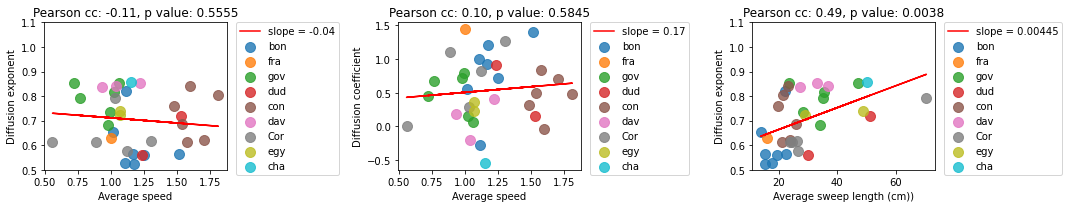

In [9]:
#plot ave_speed against replay_exponent for each animal, each with different color in subplot 1
#plot sweep_len against replay_exponent for each animal, each with different color in subplot 2
#using all_ave_speed_perday, all_sweep_len_perday, all_exponent_perday here

#group all the keys in all_ave_speed_perday, all_sweep_len_perday, all_exponent_perday by animal name
all_ave_speed_peranimal = {}

#first avearge all the values under each key in all_ave_speed_perday, all_sweep_len_perday, all_exponent_perday
all_ave_speed_perday_ave = {}
all_sweep_len_perday_ave = {}
all_exponent_perday_ave = {}
all_intercept_perday_ave = {}
for key in all_ave_speed_perday.keys():
    all_ave_speed_perday_ave[key] = np.mean(all_ave_speed_perday[key])
    all_sweep_len_perday_ave[key] = np.mean(all_sweep_len_perday[key])
    all_exponent_perday_ave[key] = np.mean(all_exponent_perday[key])
    all_intercept_perday_ave[key] = np.mean(all_intercept_perday[key])
    
#group all the keys in all_ave_speed_perday, all_sweep_len_perday, all_exponent_perday by animal name
all_ave_speed_perday_concat = {}
all_sweep_len_perday_concat = {}
all_exponent_perday_concat = {}
all_intercept_perday_concat = {}
for key in all_ave_speed_perday.keys():
    all_ave_speed_perday_concat.setdefault(key[0], []).append(all_ave_speed_perday_ave[key])
    all_sweep_len_perday_concat.setdefault(key[0], []).append(all_sweep_len_perday_ave[key])
    all_exponent_perday_concat.setdefault(key[0], []).append(all_exponent_perday_ave[key])
    all_intercept_perday_concat.setdefault(key[0], []).append(all_intercept_perday_ave[key])
   
#select colors equals to number of animals from a colormap
#put them in a dictionary with animal names as keys
colors = plt.cm.get_cmap('tab10', len(animal_names))
color_dict = {}
for i, name in enumerate(animal_names):
    color_dict[name] = colors(i)
 
plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
#plot all_exponent_perday_concat against all_ave_speed_perday_concat
for name in animal_names:
    plt.scatter(np.array(all_ave_speed_perday_concat[name]), 
                np.array(all_exponent_perday_concat[name]), 
                label=name, s=100, alpha=0.8, color=color_dict[name])
#add linear fit line to the plot using numpy.polyfit
#convert all_ave_speed_perday_concat and all_exponent_perday_concat to numpy array
exp_np = np.concatenate(list(all_exponent_perday_concat.values()))
speed_np = np.concatenate(list(all_ave_speed_perday_concat.values()))
slope, intercept = np.polyfit(speed_np, exp_np, 1)
plt.plot(speed_np, speed_np*slope+intercept, 'r-', label='slope = %.2f'%slope)

#pearson test
corr, p = pearsonr(speed_np, exp_np)
plt.title('Pearson cc: %.2f, p value: %.4f'%(corr, p))
plt.xlabel('Average speed')
plt.ylabel('Diffusion exponent')
#put the legend outside the plot on the right side
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.ylim([0.5, 1.1])

#intercept
plt.subplot(1,3,2)
#plot all_intercept_perday_concat against all_ave_speed_perday_concat
for name in animal_names:
    plt.scatter(np.array(all_ave_speed_perday_concat[name]), 
                np.array(all_intercept_perday_concat[name]), 
                label=name, s=100, alpha=0.8, color=color_dict[name])
#add linear fit line to the plot using numpy.polyfit
#convert all_ave_speed_perday_concat and all_intercept_perday_concat to numpy array
intercept_np = np.concatenate(list(all_intercept_perday_concat.values()))
speed_np = np.concatenate(list(all_ave_speed_perday_concat.values()))
slope, intercept = np.polyfit(speed_np, intercept_np, 1)
plt.plot(speed_np, speed_np*slope+intercept, 'r-', label='slope = %.2f'%slope)

#pearson test
corr, p = pearsonr(speed_np, intercept_np)
plt.title('Pearson cc: %.2f, p value: %.4f'%(corr, p))
plt.xlabel('Average speed')
plt.ylabel('Diffusion coefficient')
#put the legend outside the plot on the right side
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.subplot(1,3,3)
#plot all_exponent_perday_concat against all_sweep_len_perday_concat
for name in animal_names:
    plt.scatter(np.array(all_sweep_len_perday_concat[name]), 
                np.array(all_exponent_perday_concat[name]), 
                label=name, s=100, alpha=0.8, color=color_dict[name])   
#add linear fit line to the plot using numpy.polyfit
#convert all_sweep_len_perday_concat and all_exponent_perday_concat to numpy array
exp_np = np.concatenate(list(all_exponent_perday_concat.values()))
sweep_len_np = np.concatenate(list(all_sweep_len_perday_concat.values()))
slope, intercept = np.polyfit(sweep_len_np, exp_np, 1)
plt.plot(sweep_len_np, sweep_len_np*slope+intercept, 'r-', label='slope = %.5f'%slope)
#pearson test
corr, p = pearsonr(sweep_len_np, exp_np)
plt.title('Pearson cc: %.2f, p value: %.4f'%(corr, p))
plt.xlabel('Average sweep length (cm))')
plt.ylabel('Diffusion exponent')
#put the legend outside the plot on the right side
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.ylim([0.5, 1.1])

plt.tight_layout()
plt.show()

### In-animal shuffle

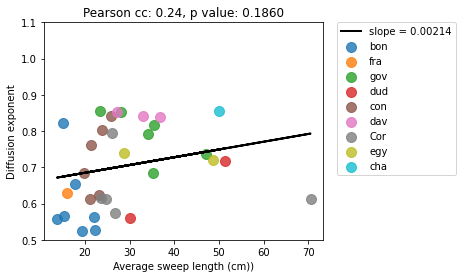

In [10]:
#for each key in all_exponent_perday_concat, shuffle the values in the list
#store the shuffled values in a new dictionary
all_exponent_perday_concat_shuffled = {}
for key in all_exponent_perday_concat.keys():
    all_exponent_perday_concat_shuffled[key] = np.random.permutation(all_exponent_perday_concat[key])
    
#copy all_sweep_len_perday_concat to a new dictionary
all_sweep_len_perday_concat_shuffled = all_sweep_len_perday_concat.copy()

#plot all_exponent_perday_concat_shuffled against all_sweep_len_perday_concat_shuffled
plt.figure(figsize=(5,4))
for name in animal_names:
    plt.scatter(np.array(all_sweep_len_perday_concat_shuffled[name]), 
                np.array(all_exponent_perday_concat_shuffled[name]), 
                label=name, s=100, alpha=0.8, color=color_dict[name])
#add linear fit line to the plot using numpy.polyfit
#convert all_sweep_len_perday_concat_shuffled and all_exponent_perday_concat_shuffled to numpy array
exp_np = np.concatenate(list(all_exponent_perday_concat_shuffled.values()))
sweep_len_np = np.concatenate(list(all_sweep_len_perday_concat_shuffled.values()))
slope, intercept = np.polyfit(sweep_len_np, exp_np, 1)
plt.plot(sweep_len_np, sweep_len_np*slope+intercept, 'k-', label='slope = %.5f'%slope, linewidth=2)
#pearson test
corr, p = pearsonr(sweep_len_np, exp_np)
plt.title('Pearson cc: %.2f, p value: %.4f'%(corr, p))
plt.xlabel('Average sweep length (cm))')
plt.ylabel('Diffusion exponent')
plt.ylim([0.5, 1.1])
#put the legend outside the plot on the right side
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    

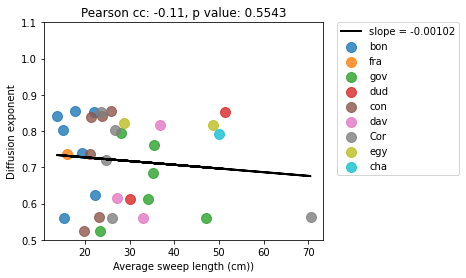

In [11]:
#for each key in all_exponent_perday_concat, shuffle the values in the list by replacing each of them with a 
#random value sampled from other keys, and store the shuffled values in a new dictionary
all_exponent_perday_concat_shuffled_crossanimal = {}
for key in all_exponent_perday_concat.keys():
    #first get all the values except the values under the current key
    all_values = []
    for key2 in all_exponent_perday_concat.keys():
        if key2 != key:
            all_values.extend(all_exponent_perday_concat[key2])
    #then shuffle the values under the current key by sampling the same number of values from all_values
    all_exponent_perday_concat_shuffled_crossanimal[key] = np.random.choice(all_values, len(all_exponent_perday_concat[key]), replace=False)
#copy all_sweep_len_perday_concat to a new dictionary
all_sweep_len_perday_concat_shuffled_crossanimal = all_sweep_len_perday_concat.copy()

#plot all_exponent_perday_concat_shuffled_crossanimal against all_sweep_len_perday_concat_shuffled_crossanimal
plt.figure(figsize=(5,4))
for name in animal_names:
    plt.scatter(np.array(all_sweep_len_perday_concat_shuffled_crossanimal[name]), 
                np.array(all_exponent_perday_concat_shuffled_crossanimal[name]), 
                label=name, s=100, alpha=0.8, color=color_dict[name])
#add linear fit line to the plot using numpy.polyfit
#convert all_sweep_len_perday_concat_shuffled_crossanimal and all_exponent_perday_concat_shuffled_crossanimal to numpy array
exp_np = np.concatenate(list(all_exponent_perday_concat_shuffled_crossanimal.values()))
sweep_len_np = np.concatenate(list(all_sweep_len_perday_concat_shuffled_crossanimal.values()))
slope, intercept = np.polyfit(sweep_len_np, exp_np, 1)
plt.plot(sweep_len_np, sweep_len_np*slope+intercept, 'k-', label='slope = %.5f'%slope, linewidth=2)
#pearson test
corr, p = pearsonr(sweep_len_np, exp_np)
plt.title('Pearson cc: %.2f, p value: %.4f'%(corr, p))
plt.xlabel('Average sweep length (cm))')
plt.ylabel('Diffusion exponent')
plt.ylim([0.5, 1.1])
#put the legend outside the plot on the right side
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
